In [1]:
# !pip install requests
# !pip install bs4
# !pip install pandas

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import spacy

In [3]:
toi_url = 'https://timesofindia.indiatimes.com/india/coronavirus-live-updates-total-confirmed-coronavirus-cases-in-india-janata-curfew-today-22-march-2020/liveblog/74754269.cms?curpg={}'

In [4]:
def get_toi_corona_live_updates(toi_url, no_of_pages_to_scrape):

    corona_news = []
    for i in range(no_of_pages_to_scrape):
        print('Scraping Data from URL: {}'.format(toi_url.format(i)))
        response = requests.get(toi_url.format(i))

        try:
            soup = BeautifulSoup(response.text,'html.parser')
            top_news_container = soup.find('div',class_ = '_3i7A1')
            for news_container in top_news_container.find_all('div',class_ = '_2tvI3'):
                news = {}
            #     news_time_tag = news_container.find('div',class_ = 'uu5Lm')
                news['datetime'] = news_container.span.text

                news_text = news_container.find('div',class_ = '_1KydD').get_text()
                news['text'] = news_text  #news_container.p.b.text
                corona_news.append(news)
                
        except:
            print('No more news at page {}'.format(i))
            break
    return corona_news

In [6]:
corona_news = get_toi_corona_live_updates( toi_url= toi_url , no_of_pages_to_scrape= 20 )

Scraping Data from URL: https://timesofindia.indiatimes.com/india/coronavirus-live-updates-total-confirmed-coronavirus-cases-in-india-janata-curfew-today-22-march-2020/liveblog/74754269.cms?curpg=0
Scraping Data from URL: https://timesofindia.indiatimes.com/india/coronavirus-live-updates-total-confirmed-coronavirus-cases-in-india-janata-curfew-today-22-march-2020/liveblog/74754269.cms?curpg=1
Scraping Data from URL: https://timesofindia.indiatimes.com/india/coronavirus-live-updates-total-confirmed-coronavirus-cases-in-india-janata-curfew-today-22-march-2020/liveblog/74754269.cms?curpg=2
Scraping Data from URL: https://timesofindia.indiatimes.com/india/coronavirus-live-updates-total-confirmed-coronavirus-cases-in-india-janata-curfew-today-22-march-2020/liveblog/74754269.cms?curpg=3
Scraping Data from URL: https://timesofindia.indiatimes.com/india/coronavirus-live-updates-total-confirmed-coronavirus-cases-in-india-janata-curfew-today-22-march-2020/liveblog/74754269.cms?curpg=4
Scraping D

In [7]:
df = pd.DataFrame(corona_news)

In [8]:
df.head()

,datetime,text
0,"23:37 (IST), Mar 22",Republican Rand Paul becomes first US senator ...
1,"23:34 (IST), Mar 22","Coronavirus: SC cancels benches, only one cour..."
2,"23:30 (IST), Mar 22",German Chancellor Angela Merkel will quarantin...
3,"22:59 (IST), Mar 22",There was a case reported of suspected Covid-1...
4,"22:48 (IST), Mar 22","Italy reports 651 new virus death, toll nears ..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 2 columns):
datetime    220 non-null object
text        220 non-null object
dtypes: object(2)
memory usage: 3.5+ KB


In [10]:
nlp = spacy.load('en_core_web_sm')

In [11]:
# for news in df.text:
#     print('NEWS : {}'.format(news))
#     for ent in nlp(news).ents:
#         print('\t Text : {} , Entities : {}'.format(ent.text ,ent.label_))

In [12]:
entities = []
for news in df.text:
    entity = []
#     print('NEWS : {}'.format(news))
    entity = [(ent.text) for ent in nlp(news).ents]
#     for ent in nlp(news).ents:
#         entity['text'] = ent.text
#         entity['label'] = ent.label_
    entities.append(entity)

In [13]:
from pandas.core.common import flatten

words = list(flatten(entities))

In [14]:
# !pip install wordcloud
# !pip install matplotlib

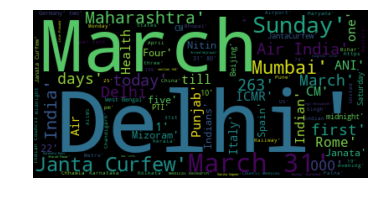

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline


wordcloud = WordCloud().generate(str(entities))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [16]:
economic_times_url = 'https://economictimes.indiatimes.com/news/politics-and-nation/coronavirus-cases-in-india-live-news-latest-updates-march22/liveblog/74754630.cms'

In [17]:
response = requests.get(economic_times_url)
soup = BeautifulSoup(response.text,'html.parser')
top_news_container = soup.find('div',class_ = 'pageliveblog')

In [18]:
econ_times_corona_news = []
for news_container in top_news_container.find_all('div',class_ = 'updateText'):
    news = {}
    news_time_tag = news_container.find('div',class_ = 'shareTime')
    time = news_time_tag.find('div',class_ = 'timeStamp').text.replace('\n','')
    #     news['datetime'] = time.text
    news['datetime'] = time
    try:
        headline = news_container.find('h3').text.replace('\n','')
    except:
        headline = ' '
        continue
    try:   
        text = news_container.find('div',class_ = 'blogSysn').text.replace('\n','')
    except:
        text = ' '
        
    news['text'] = headline + ' ' + text
    
    econ_times_corona_news.append(news)

In [19]:
df_economic_times  = pd.DataFrame(econ_times_corona_news)

In [20]:
df_economic_times.head()

,datetime,text
0,11:30 PM,U.S. Senator for Kentucky tests positive for c...
1,11:24 PM,German Chancellor Angela Merkel in quarantine ...
2,11:24 PM,All assemblies at public places to be restrict...
3,11:23 PM,Shutdown of all establishments and services ex...
4,10:58 PM,27 COVID-19 positive cases in Delhi: 21 travel...


In [21]:
df_economic_times.tail()

,datetime,text
54,06:13 PM,"15 UP districts, including Lucknow, Varanasi a..."
55,06:09 PM,Spain reports virus deaths up 30 percent in on...
56,05:59 PM,Singaporeans of Indian origin join in to clap ...
57,05:56 PM,The lockdown will be effective from March 23 t...
58,05:54 PM,Man having travelled to Paris tests positive f...


In [22]:
!pip install selenium

In [23]:
from selenium import webdriver

options = webdriver.ChromeOptions()
options.add_argument('--ignore-certificate-errors')
options.add_argument('--incognito')
options.add_argument('--headless')
driver = webdriver.Chrome(executable_path='C:/chrome_driver/chromedriver.exe')


In [24]:
import time

# driver.get("https://www.cnbctv18.com/healthcare/coronavirus-india-live-updates-coronavirus-live-news-updates-coronavirus-covid-19-pune-maharashtra-mumbai-delhi-noida-uttar-pradesh-bengaluru-gurgaon-coronavirus-cases-in-india-5512961.htm")
driver.get('https://www.cnbctv18.com/politics/coronavirus-live-coronavirus-live-updates-coronavirus-in-india-latest-news-updates-live-news-coronavirus-blog-covid-19-live-news-covid-19-india-news-mumbai-delhi-pune-nagpur-uttar-pradesh-gurgaon-5530481.htm')
more_buttons = driver.find_element_by_link_text('View More')

In [25]:
for x in range(7):
  if more_buttons.is_displayed():
      driver.execute_script("arguments[0].click();", more_buttons)
      time.sleep(7)
page_source = driver.page_source

In [26]:
soup_cnbc = BeautifulSoup(page_source,'lxml')
top_news_container = soup_cnbc.find_all('div',class_ = 'live-blog-row blog-border-red share-post')

In [27]:
cnbc_corona_news = []
for each_news in top_news_container:
    cnbc_news = {}
    
    try:
        cnbc_news['datetime'] = each_news.find('div',class_ = 'date-n-time').get_text().replace('\n','')
        cnbc_news['text'] = each_news.find('div',class_= 'copy').get_text().replace('\n','')
    except:
        continue
    cnbc_corona_news.append(cnbc_news)

In [28]:
top_news_container_2 = soup_cnbc.find_all('div',class_ = 'live-blog-row blog-border-red')
for each_news in top_news_container_2:
    cnbc_news = {}
    
    try:
        cnbc_news['datetime'] = each_news.find('div',class_ = 'date-n-time').get_text().replace('\n','')
        cnbc_news['text'] = each_news.find('div',class_= 'copy').get_text().replace('\n','')
    except:
        continue
    cnbc_corona_news.append(cnbc_news)

In [29]:
df_cnbc  = pd.DataFrame(cnbc_corona_news)

In [30]:
df_cnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
datetime    51 non-null object
text        51 non-null object
dtypes: object(2)
memory usage: 896.0+ bytes


In [31]:
df_all_news_scraped = pd.concat([df,df_economic_times,df_cnbc],ignore_index=True)

In [32]:
df_all_news_scraped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 2 columns):
datetime    330 non-null object
text        330 non-null object
dtypes: object(2)
memory usage: 5.2+ KB


In [33]:
df_all_news_scraped.to_csv('../Data/corona_news_scraped_on_23rd_march.csv',index = False)